In [17]:
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt

import tpot

In [13]:
RANDOM_SEED=1234

In [2]:
datapath = "../DigitalEcosystem/all_data_features.pkl"
all_data = pd.read_pickle(datapath)

In [4]:
all_data.drop(columns=["atoms_object (unitless)", "pymatgen_structure (unitless)"])

,Ac (atoms),Ac-Se (bonds),Ac-Se-Ac (angles),Ag (atoms),Ag-Ag (bonds),Ag-Ag-Ag (angles),Ag-Ag-Bi (angles),Ag-Ag-Br (angles),Ag-Ag-C (angles),Ag-Ag-Cl (angles),...,Zr-Zr-O (angles),Zr-Zr-S (angles),Zr-Zr-Sb (angles),Zr-Zr-Se (angles),Zr-Zr-Si (angles),Zr-Zr-Sn (angles),Zr-Zr-Te (angles),Zr-Zr-Zn (angles),Zr-Zr-Zr (angles),bandgap (eV)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9814
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1990
6347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
6348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
6349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [35]:
data_train, data_test = sklearn.model_selection.train_test_split(all_data.drop(columns=["atoms_object (unitless)", "pymatgen_structure (unitless)"]),
                                                                 random_state=RANDOM_SEED,
                                                                 test_size=0.2)

target = "bandgap (eV)"
train_x = data_train.drop(columns=[target]).to_numpy()
train_y = data_train[target].to_numpy()

test_x = data_test.drop(columns=[target]).to_numpy()
test_y = data_test[target].to_numpy()

In [37]:
model = tpot.TPOTRegressor(
    generations=None,
    population_size=100,
    max_eval_time_mins=10/60,
    max_time_mins=20,
    cv=5,
    verbosity=2,
    scoring="r2",
    config_dict=tpot.config.regressor_config_dict,
    n_jobs=4,
    random_state=RANDOM_SEED
)
model.fit(features=train_x, target=train_y)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.3262118769575119

20.91 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: DecisionTreeRegressor(input_matrix, max_depth=6, min_samples_leaf=15, min_samples_split=7)


TPOTRegressor(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                 'l1',
                                                                                 'l2',
                                                                                 'manhattan',
                                                                                 'cosine'],
                                                                    'linkage': ['ward',
                                                                                'complete',
                                                                                'average']},
                           'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                           'sklearn.decomposition.PCA': {'iter

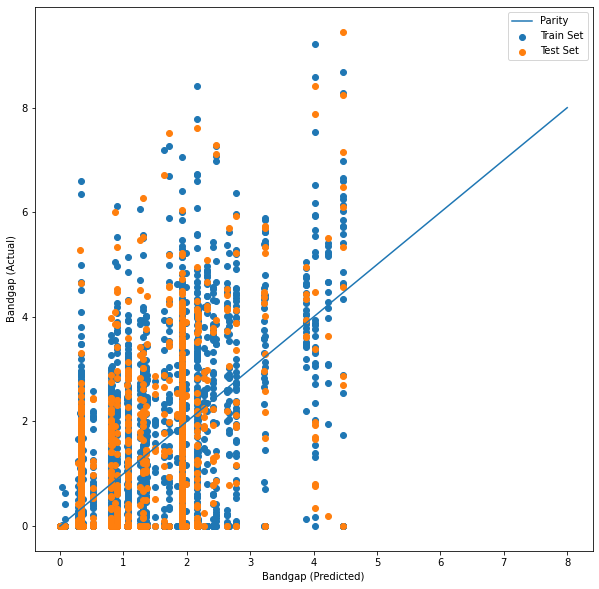

In [38]:
train_y_pred = model.predict(train_x)
test_y_pred = model.predict(test_x)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(x=train_y_pred, y=train_y, label="Train Set")
plt.scatter(x=test_y_pred, y=test_y, label="Test Set")
plt.plot([0,8], [0,8], label="Parity")
plt.ylabel("Bandgap (Actual)")
plt.xlabel("Bandgap (Predicted)")
plt.legend()

In [39]:
import ase

In [40]:
ase.__version__

'3.19.3'